## Importing required libraries :

In [1]:
# Libraries used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries used
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## 1: Data Understanding

In [2]:
#read data

df=pd.read_csv("day.csv")

- data sanity checks

In [3]:
# Checking the head of the dataset
 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking the shape of dataframe

df.shape

(730, 16)

In [5]:
# describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# getting info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#instant column looks index column which will not contribute in our analysis so we will drop

df.drop(["instant"],axis=1,inplace=True)

df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# dteday column has same data as yr,mnth column has ,so dropping dteday column

df.drop(['dteday'],axis=1 ,inplace=True)

#As we know that casual+registered=cnt & 'cnt' is our target variable so we can drop columns registered and casual.

df.drop(['casual','registered'],axis=1,inplace=True)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Renaming some columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [11]:
# we can see that season,yr,mnth,holiday,weekday,workingday,weathersit are categorical variable,
#so we need to map them with proper values

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

## 2 : Data Analysis

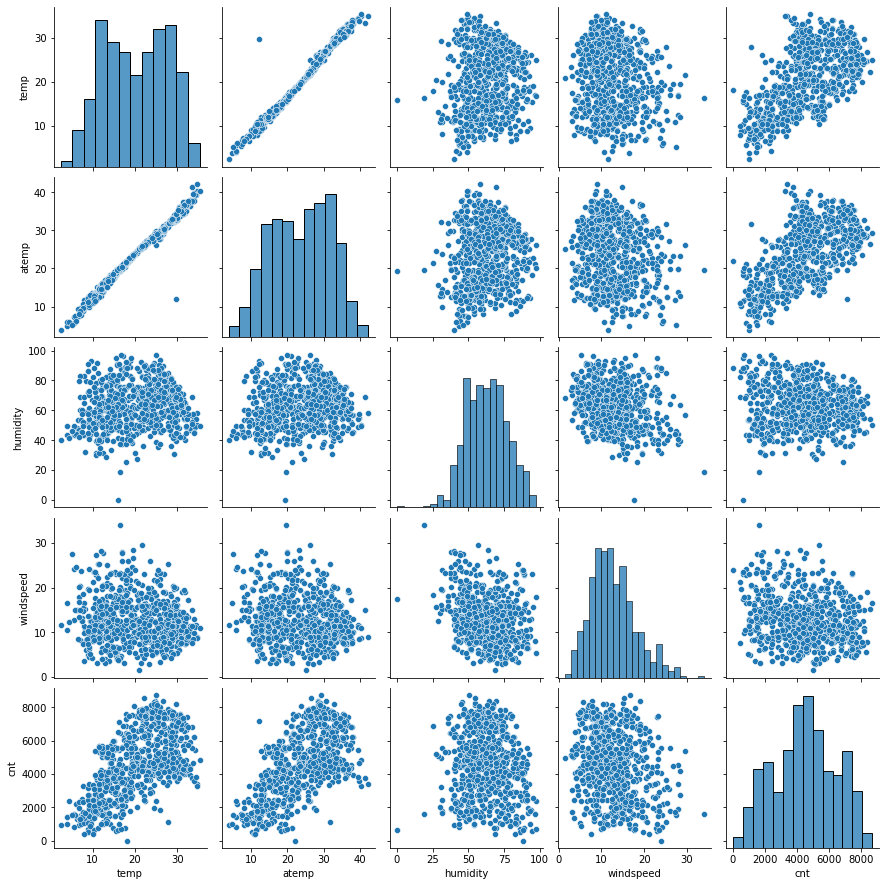

In [12]:
#Pairplot for numerical variables analysis

sns.pairplot(df, vars=['temp','atemp','humidity','windspeed',"cnt"])
plt.show()

- Inference:
temp & atemp has a linear relationship

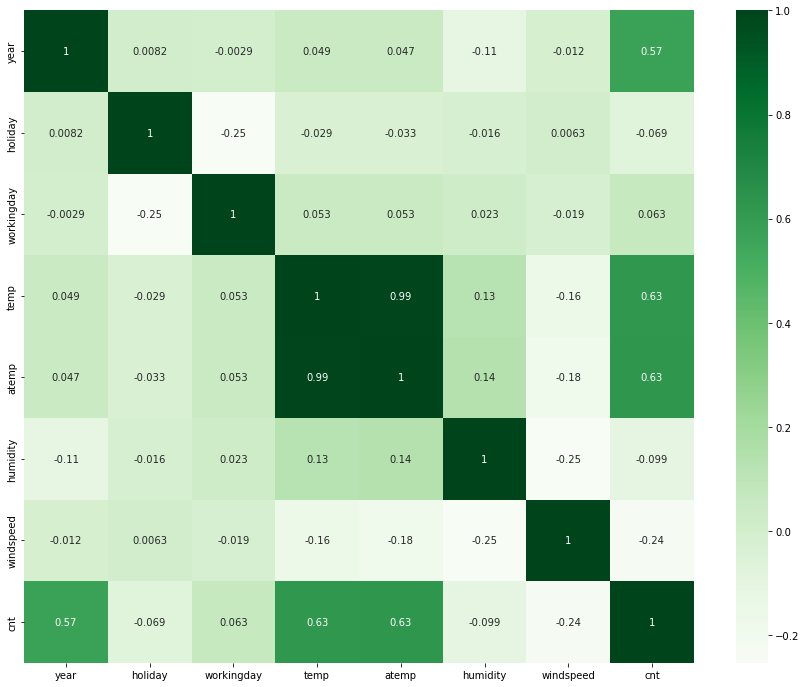

In [13]:
# checking correlation 
plt.figure(figsize = (15, 12))
sns.heatmap(df.corr(), annot = True, cmap="Greens")
plt.show()

In [14]:
#As correlation between temp and atemp is 0.99 ~ 1
#so let drop temp and consider atemp

df.drop(['temp'],axis=1,inplace=True)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,11.46350,43.6957,12.522300,1600


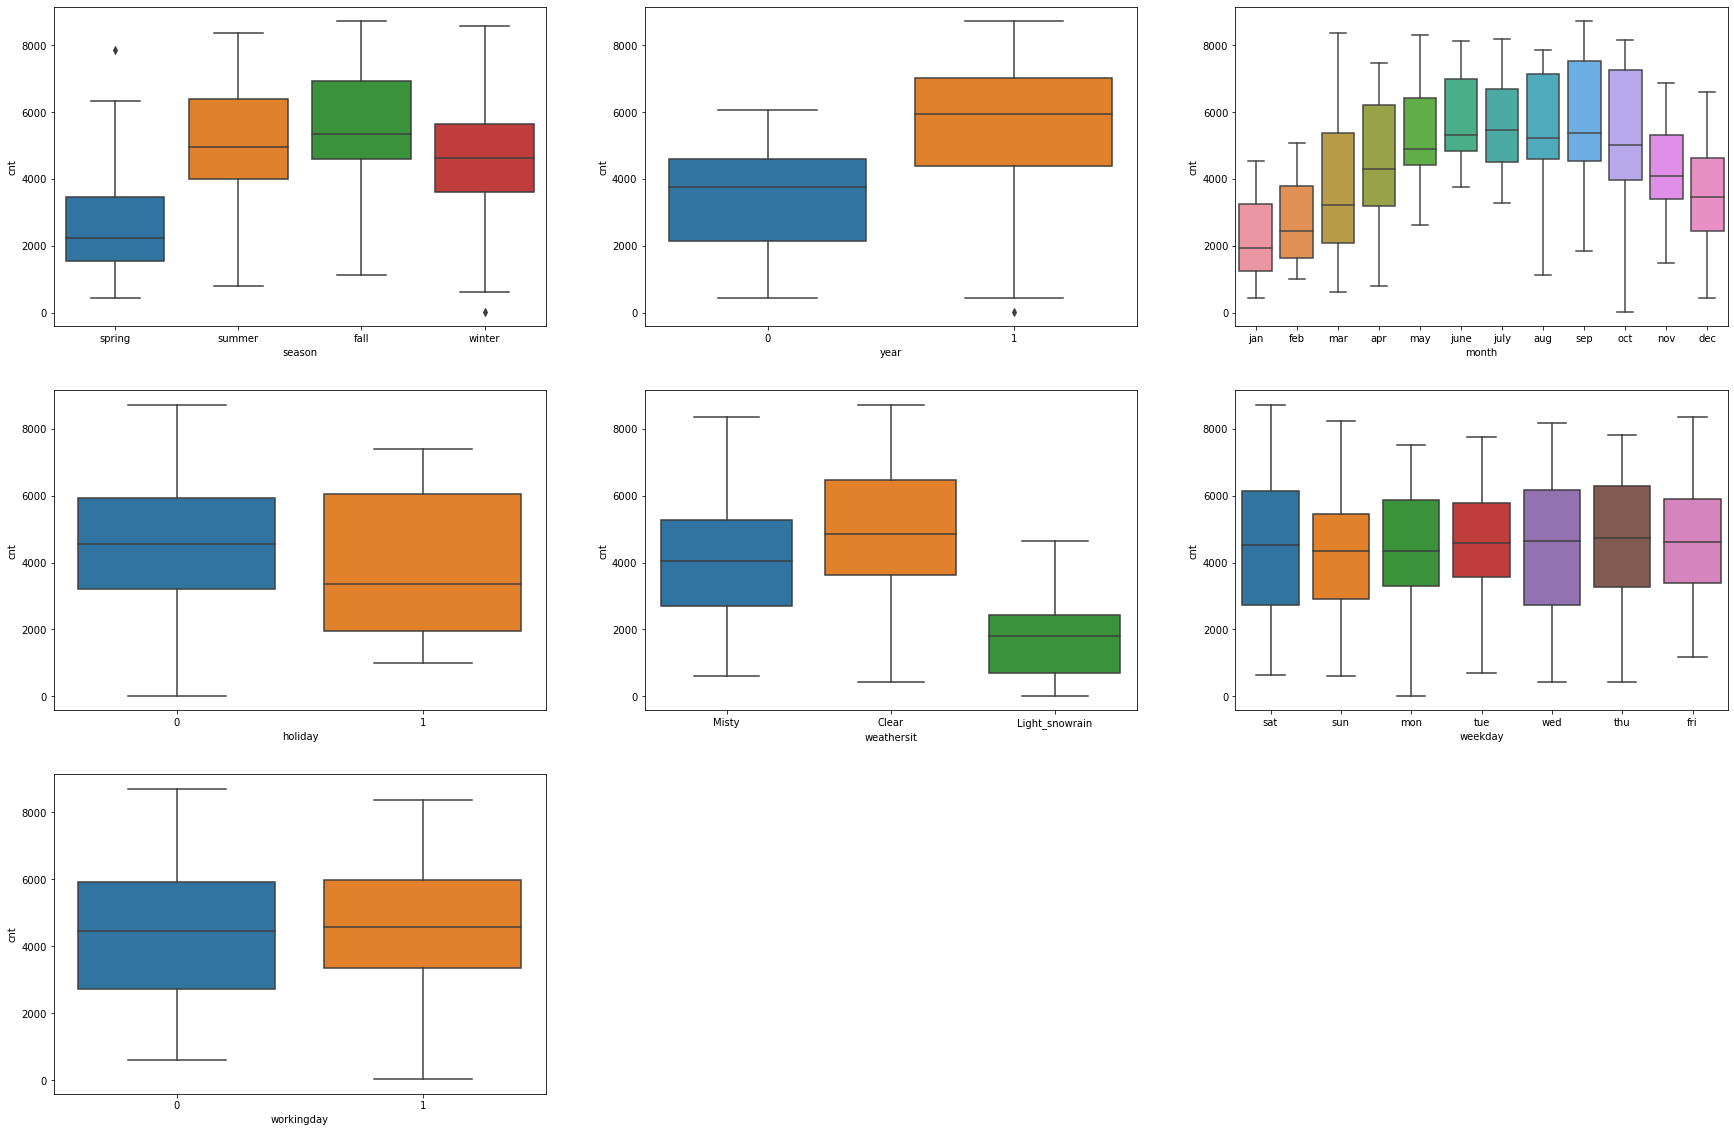

In [16]:
# Analyzing categorical Variables
plt.figure(figsize=(30,20))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='year', y='cnt', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='month', y='cnt', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.show()

## 3 : Data Preparation

In [17]:
# Creating dummy variable for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [19]:
# Merging dummy variables with dataframe 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [20]:
#Dropping columns season,weathersit,weekday,month as we have already created dummy variables
df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

# check the head of new dataframe

df_new.head()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [21]:
# checking shape of new dataframe

df_new.shape

(730, 29)

In [22]:
# checking column info of new dataframe 

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   atemp           730 non-null    float64
 4   humidity        730 non-null    float64
 5   windspeed       730 non-null    float64
 6   cnt             730 non-null    int64  
 7   aug             730 non-null    uint8  
 8   dec             730 non-null    uint8  
 9   feb             730 non-null    uint8  
 10  jan             730 non-null    uint8  
 11  july            730 non-null    uint8  
 12  june            730 non-null    uint8  
 13  mar             730 non-null    uint8  
 14  may             730 non-null    uint8  
 15  nov             730 non-null    uint8  
 16  oct             730 non-null    uint8  
 17  sep             730 non-null    uin

## 4 : Splitting the Data into Train and Test Sets

In [24]:
# train and test dataset should have same rows, So
np.random.seed(0)

# splitting the dataframe into Train and Test

df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [25]:
# checking shape of train & test set

print('Shape of the Train set is:' , df_train.shape)
print('Shape of the Test set is:' , df_test.shape)

Shape of the Train set is: (510, 29)
Shape of the Test set is: (220, 29)


- **Feature Scaling**

In [26]:
# Using MinMaxScaler for feature scaling

scaler = MinMaxScaler()

In [27]:
# checking the head of dataset before scaling

df_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,16.0977,72.9583,14.707907,1683,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [29]:
# Applying scaler() to numerical variables

num_vars = ['atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [30]:
# checking the head of dataset after scaling

df_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.318819,0.751824,0.380981,0.191095,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [31]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- **Building model using RFE**

In [32]:
#Creating X AND Y train set for building linear model
y_train = df_train.pop('cnt')
X_train = df_train

In [33]:
# Using recursive feature elimination approach with 15 vars initailly

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [34]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', True, 1),
 ('dec', False, 7),
 ('feb', False, 3),
 ('jan', True, 1),
 ('july', False, 6),
 ('june', False, 5),
 ('mar', False, 13),
 ('may', False, 4),
 ('nov', False, 8),
 ('oct', False, 2),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', False, 14),
 ('summer', True, 1),
 ('winter', True, 1)]

In [35]:
# storing the selected variable via RFE in column list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'aug', 'jan', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'summer',
       'winter'],
      dtype='object')


In [36]:
# checking columns which are not included

X_train.columns[~rfe.support_]

Index(['dec', 'feb', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'mon', 'thu',
       'tue', 'wed', 'spring'],
      dtype='object')

- **VIF Calculation**

In [37]:
# Function to calculate VIF 

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [38]:
# dataframe with RFE variables

X_train_rfe = X_train[col]

In [39]:
# calculating VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,34.11
9,sat,8.40
10,sun,8.22
1,holiday,2.24
3,atemp,1.91
4,humidity,1.89
12,Misty,1.57
14,winter,1.56
7,jan,1.55
13,summer,1.49


## 5 : Linear Model Building

In [40]:
# Building LR Model-1

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sat, 09 Jul 2022   Prob (F-statistic):          1.52e-188
Time:                        18:01:23   Log-Likelihood:                 510.80
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     495   BIC:                            -928.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.023      7.

In [41]:
# As workingday shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,18.85
2,atemp,11.47
4,windspeed,3.66
11,Misty,2.18
0,year,2.04
13,winter,2.03
12,summer,1.97
5,aug,1.57
6,jan,1.54
7,sep,1.32


In [46]:
# Above VIF calculation shows high value for humidity ,So we can drop it
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,atemp,5.07
3,windspeed,3.36
0,year,2.04
11,summer,1.91
12,winter,1.58
4,aug,1.57
10,Misty,1.55
6,sep,1.31
5,jan,1.23
7,sat,1.22


- As we can see VIF values seem good now

In [47]:
# Building LR Model-2

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sat, 09 Jul 2022   Prob (F-statistic):          1.06e-185
Time:                        18:27:15   Log-Likelihood:                 501.27
No. Observations:                 510   AIC:                            -974.5
Df Residuals:                     496   BIC:                            -915.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1610      0.020      8.

In [48]:
# dropping sat variable as it has high p-value
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,atemp,5.03
3,windspeed,3.29
0,year,2.04
10,summer,1.91
11,winter,1.57
4,aug,1.56
9,Misty,1.55
6,sep,1.31
5,jan,1.23
7,sun,1.17


- VIF is not effected much after dropping ,So lets check with few more better model 

In [49]:
# Building LR Model-3

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.0
Date:                Sat, 09 Jul 2022   Prob (F-statistic):          1.09e-186
Time:                        18:33:27   Log-Likelihood:                 500.83
No. Observations:                 510   AIC:                            -975.7
Df Residuals:                     497   BIC:                            -920.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1630      0.020      8.

In [50]:
# dropping jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,atemp,5.00
3,windspeed,3.07
0,year,2.00
9,summer,1.83
4,aug,1.55
10,winter,1.51
8,Misty,1.49
5,sep,1.30
6,sun,1.17
7,Light_snowrain,1.08


In [51]:
# Building LR Model-4

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     227.9
Date:                Sat, 09 Jul 2022   Prob (F-statistic):          2.34e-186
Time:                        18:37:08   Log-Likelihood:                 497.23
No. Observations:                 510   AIC:                            -970.5
Df Residuals:                     498   BIC:                            -919.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1355      0.017      7.

- **The p-value for the above model is almost 0.0 for all predictors and R2 is 0.83.**
  **Also multicolinearity between predictors is low ,So the overall model is significant**   **and we can consider the above model.**

In [53]:
# Checking the parameters and coefficient values for final model
lr_4.params

const             0.135466
year              0.233344
holiday          -0.101260
atemp             0.537898
windspeed        -0.131892
aug               0.065019
sep               0.118233
sun              -0.048504
Light_snowrain   -0.281369
Misty            -0.084201
summer            0.097994
winter            0.132448
dtype: float64

## 6 : Residual Analysis & Validation

In [54]:
#Predicted values
y_train_pred = lr_4.predict(X_train_lm_4)

In [55]:
# Residual calculation
res=y_train - y_train_pred

- **Normality of error terms**

Text(0.5, 0, 'Errors')

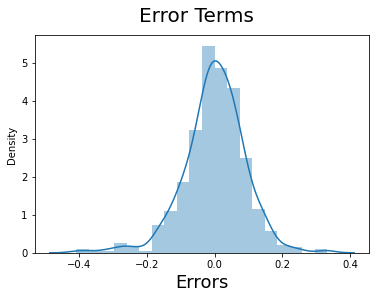

In [56]:
# Plotting histogram for error terms

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Clearly Error terms follows normal distribution

- **Validating Linear Relationship**

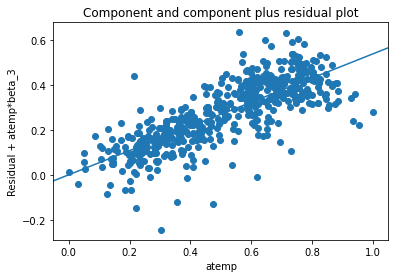

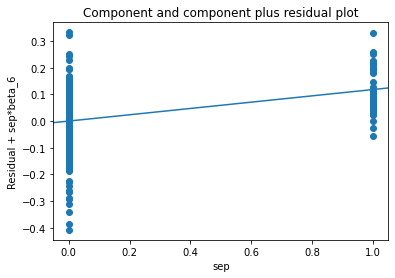

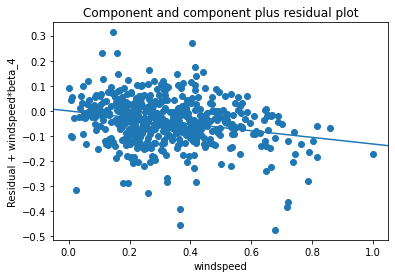

In [58]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_4, 'atemp')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'windspeed')
plt.show()

Thus Linearity is observed in above plots.

- **Validating Multi Colinearity**

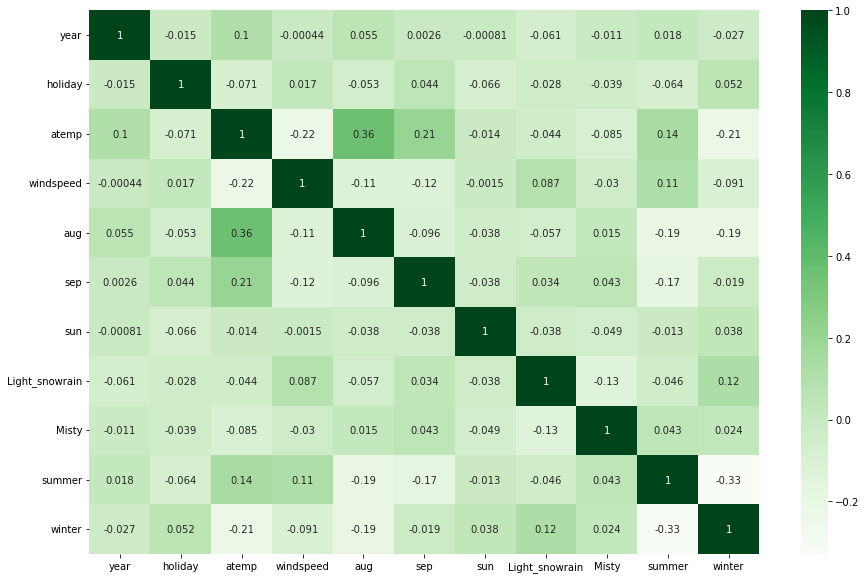

In [59]:
#Plotting heatmap to validate

plt.figure(figsize=(15,10))
sns.heatmap(X_train_new.corr(),annot = True, cmap="Greens")
plt.show()

So no multicolinearity can be seen from the heatmap and VIF is less than 5.

- **Validating Homoscedasticity**

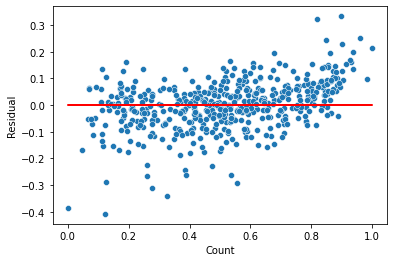

In [60]:
# Validating Homoscedasticity : The residuals have constant variance with respect to the dependent variable ,using scatterplot
y_train_pred = lr_4.predict(X_train_lm_4)
sns.scatterplot(y_train,res)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

There is no visible pattern observed in above plot for residuals.

- **Validating for Independence of residuals**

In [61]:
# Independence of residuals i.e absence of auto-correlation
# we can verify that the observations are not auto-correlated using the Durbin-Watson test. 
# The test gives output values between 0 and 4. The closer it is to 2, the less auto-correlation exist between variables
# (0–2: positive auto-correlation, 2–4: negative auto-correlation)

print('The Durbin-Watson value for Final Model is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model is 2.0599


Durbin-Watson value of final model lr_4 is 2.0599, which signifies there is no autocorrelation.

## 7 : Making Predictions Using the Final Model

In [62]:
# Applying scaling on test dataset
num_vars = ['atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [63]:
# Dividing dataframe into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [64]:
#Assigning columns of LR Model 4
col1 = X_train_new.columns

X_test = X_test[col1]

In [65]:
# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test)

In [67]:
# Making prediction using Final Model(LR Model 4)
y_pred = lr_4.predict(X_test_lm_4)

#Checking r2 value
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7984

## 8 : Model Evaluation

- Plotting graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

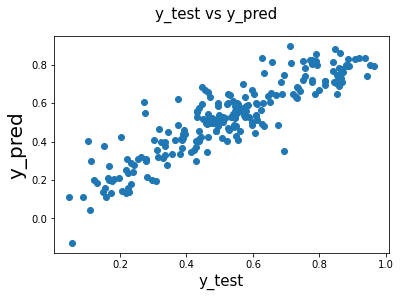

In [69]:
# Plotting y_test and y_pred to check the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15) 
plt.xlabel('y_test', fontsize = 15)
plt.ylabel('y_pred', fontsize = 20) 

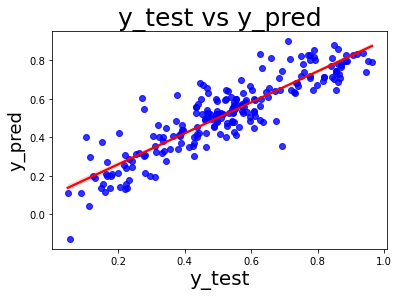

In [70]:
# Visualizing the fit on test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=70, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=25)
plt.xlabel('y_test', fontsize=20)
plt.ylabel('y_pred', fontsize=18)
plt.show()

In [71]:
# To find equation of best fitted line developed by Final model(LR MOdel 4) is :

round(lr_4.params,4)

const             0.1355
year              0.2333
holiday          -0.1013
atemp             0.5379
windspeed        -0.1319
aug               0.0650
sep               0.1182
sun              -0.0485
Light_snowrain   -0.2814
Misty            -0.0842
summer            0.0980
winter            0.1324
dtype: float64

Equation of best fitted line is:

$ cnt=0.1355+0.2333*year-0.1013*holiday+0.5379*atemp-0.1319*windspeed+0.0650*aug+0.1182*sep-0.0485*sun-0.2814*Light_snowrain-0.0842*Misty+0.0980*summer+0.1324*winter $

In [73]:
# As asked in problem statement
#calculate the R-squared score on the test set

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7984226963141585

## 9 : Conclusion

After analysing the above model the company BoomBikes should focus on below recommendations:

1. Bike booking increases in hotter temperture ,So company must increase their bikes availaibility during summer months to increase their booking count.

2. Significant variables to predict the demand of bikes are :
  - Year
  - Holiday
  - atemp
  - months(aug & sep)
  - Sunday
  - weathersit(Misty & Light Snowrain)
  - season(summer & winter)
  - windspeed